In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization,Dropout, Conv1D, MaxPooling1D, concatenate, Activation

In [34]:
df = pd.read_csv('./train.csv')

df_scaled = df
scale_cols = df_scaled[df_scaled.columns.difference(['leaktype'])].columns

#입력 데이터에 대해 표준화 진행 후 정답 데이터 추가

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)

df_scaled['leaktype'] = df['leaktype'].values

#dataframe shuffle

df_scaled = df_scaled.sample(frac=1).reset_index(drop=True)

#입력 데이터와 정답 데이터 분리

feature_df = df_scaled[df_scaled.columns.difference(['leaktype'])]
label_df = df_scaled['leaktype']

#other : 0, noise : 1, normal : 2, in : 3, out : 4

label_df = label_df.replace('other', 0)
label_df = label_df.replace('noise', 1)
label_df = label_df.replace('normal', 2)
label_df = label_df.replace('in', 3)
label_df = label_df.replace('out', 4)

#from dataframe to numpy

feature_np = feature_df.to_numpy().astype('float32')
label_np = label_df.to_numpy().astype('float32')

#split train datasets and validation datasets

split = 0.2

test_num = int(split*len(label_np))

x_valid = feature_np[0:test_num]
y_valid = label_np[0:test_num]

x_train = feature_np[test_num:]
y_train = label_np[test_num:]

#one-hot encoding

y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=5)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

In [35]:
# train, test dataset을 0-60, 185-250, 185-330, 370-, 240-300, 330-370, 370-450, 290-400 구간으로 나누기
# 50이하인 구간이거나 뚜렷한 특징이 없는 구간은 삭제

df1_x_train = x_train[:, 0:60]
df2_x_train = x_train[:, 185:250]
df3_x_train = x_train[:, 185:330]
df4_x_train = x_train[:, 370:]
df5_x_train = x_train[:, 240:300]
df6_x_train = x_train[:, 330:370]
df7_x_train = x_train[:, 370:450]
df8_x_train = x_train[:, 290:400]
entire_x_train = x_train[:,:]

df1_x_valid = x_valid[:, 0:60]
df2_x_valid = x_valid[:, 185:250]
df3_x_valid = x_valid[:, 185:330]
df4_x_valid = x_valid[:, 370:]
df5_x_valid = x_valid[:, 240:300]
df6_x_valid = x_valid[:, 330:370]
df7_x_valid = x_valid[:, 370:450]
df8_x_valid = x_valid[:, 290:400]
entire_x_valid = x_valid[:, :]

In [36]:
df1_x_train = df1_x_train.reshape(df1_x_train.shape[0], df1_x_train.shape[1], 1)
df2_x_train = df2_x_train.reshape(df2_x_train.shape[0], df2_x_train.shape[1], 1)
df3_x_train = df3_x_train.reshape(df3_x_train.shape[0], df3_x_train.shape[1], 1)
df4_x_train = df4_x_train.reshape(df4_x_train.shape[0], df4_x_train.shape[1], 1)
df5_x_train = df5_x_train.reshape(df5_x_train.shape[0], df5_x_train.shape[1], 1)
df6_x_train = df6_x_train.reshape(df6_x_train.shape[0], df6_x_train.shape[1], 1)
df7_x_train = df7_x_train.reshape(df7_x_train.shape[0], df7_x_train.shape[1], 1)
df8_x_train = df8_x_train.reshape(df8_x_train.shape[0], df8_x_train.shape[1], 1)
entire_x_train = entire_x_train.reshape(entire_x_train.shape[0], entire_x_train.shape[1], 1)

In [37]:
#df1-8, entire 데이터셋에 대한 모델 생성

df1_input = Input(shape=(df1_x_train.shape[1],1))
df1_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df1_input)
df1_layer = BatchNormalization()(df1_layer)
df1_layer = Dropout(0.8)(df1_layer)
df1_layer = Conv1D(kernel_size=64, filters=32, activation='relu', padding='same')(df1_layer)
df1_layer = MaxPooling1D(pool_size=4, padding='same')(df1_layer)
df1_layer = Dropout(0.7)(df1_layer)
df1_layer = Flatten()(df1_layer)
df1_layer = Dense(512, activation='relu')(df1_layer)
df1_model = Model(inputs=df1_input, outputs=df1_layer)

df2_input = Input(shape=(df2_x_train.shape[1],1))
df2_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df2_input)
df2_layer = BatchNormalization()(df2_layer)
df2_layer = Dropout(0.8)(df2_layer)
df2_layer = Conv1D(kernel_size=64, filters=32, activation='relu', padding='same')(df2_layer)
df2_layer = MaxPooling1D(pool_size=4, padding='same')(df2_layer)
df2_layer = Dropout(0.7)(df2_layer)
df2_layer = Flatten()(df2_layer)
df2_layer = Dense(512, activation='relu')(df2_layer)
df2_model = Model(inputs=df2_input, outputs=df2_layer)

df3_input = Input(shape=(df3_x_train.shape[1],1))
df3_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df3_input)
df3_layer = BatchNormalization()(df3_layer)
df3_layer = Dropout(0.8)(df3_layer)
df3_layer = Conv1D(kernel_size=64, filters=32, activation='relu', padding='same')(df3_layer)
df3_layer = MaxPooling1D(pool_size=4, padding='same')(df3_layer)
df3_layer = Dropout(0.7)(df3_layer)
df3_layer = Flatten()(df3_layer)
df3_layer = Dense(512, activation='relu')(df3_layer)
df3_model = Model(inputs=df3_input, outputs=df3_layer)

df4_input = Input(shape=(df4_x_train.shape[1],1))
df4_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df4_input)
df4_layer = BatchNormalization()(df4_layer)
df4_layer = Dropout(0.8)(df4_layer)
df4_layer = Conv1D(kernel_size=64, filters=32, activation='relu', padding='same')(df4_layer)
df4_layer = MaxPooling1D(pool_size=4, padding='same')(df4_layer)
df4_layer = Dropout(0.7)(df4_layer)
df4_layer = Flatten()(df4_layer)
df4_layer = Dense(512, activation='relu')(df4_layer)
df4_model = Model(inputs=df4_input, outputs=df4_layer)

df5_input = Input(shape=(df5_x_train.shape[1],1))
df5_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df5_input)
df5_layer = BatchNormalization()(df5_layer)
df5_layer = Dropout(0.8)(df5_layer)
df5_layer = Conv1D(kernel_size=64, filters=32, activation='relu', padding='same')(df5_layer)
df5_layer = MaxPooling1D(pool_size=4, padding='same')(df5_layer)
df5_layer = Dropout(0.7)(df5_layer)
df5_layer = Flatten()(df5_layer)
df5_layer = Dense(512, activation='relu')(df5_layer)
df5_model = Model(inputs=df5_input, outputs=df5_layer)

df6_input = Input(shape=(df6_x_train.shape[1],1))
df6_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df6_input)
df6_layer = BatchNormalization()(df6_layer)
df6_layer = Dropout(0.8)(df6_layer)
df6_layer = Conv1D(kernel_size=64, filters=32, activation='relu', padding='same')(df6_layer)
df6_layer = MaxPooling1D(pool_size=4, padding='same')(df6_layer)
df6_layer = Dropout(0.7)(df6_layer)
df6_layer = Flatten()(df6_layer)
df6_layer = Dense(512, activation='relu')(df6_layer)
df6_model = Model(inputs=df6_input, outputs=df6_layer)

df7_input = Input(shape=(df7_x_train.shape[1],1))
df7_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df7_input)
df7_layer = BatchNormalization()(df7_layer)
df7_layer = Dropout(0.8)(df7_layer)
df7_layer = Conv1D(kernel_size=64, filters=32, activation='relu', padding='same')(df7_layer)
df7_layer = MaxPooling1D(pool_size=4, padding='same')(df7_layer)
df7_layer = Dropout(0.7)(df7_layer)
df7_layer = Flatten()(df7_layer)
df7_layer = Dense(256, activation='relu')(df7_layer)
df7_model = Model(inputs=df7_input, outputs=df7_layer)

df8_input = Input(shape=(df8_x_train.shape[1],1))
df8_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df8_input)
df8_layer = BatchNormalization()(df8_layer)
df8_layer = Dropout(0.8)(df8_layer)
df8_layer = Conv1D(kernel_size=64, filters=32, activation='relu', padding='same')(df8_layer)
df8_layer = MaxPooling1D(pool_size=4, padding='same')(df8_layer)
df8_layer = Dropout(0.7)(df8_layer)
df8_layer= Flatten()(df8_layer)
df8_layer = Dense(512, activation='relu')(df8_layer)
df8_model = Model(inputs=df8_input, outputs=df8_layer)

entire_input = Input(shape=(entire_x_train.shape[1],1))
entire_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(entire_input)
entire_layer = BatchNormalization()(entire_layer)
entire_layer = Dropout(0.8)(entire_layer)
entire_layer = Conv1D(kernel_size=64, filters=32, activation='relu', padding='same')(entire_layer)
entire_layer = MaxPooling1D(pool_size=4, padding='same')(entire_layer)
entire_layer = Dropout(0.7)(entire_layer)
entire_layer = Flatten()(entire_layer)
entire_layer = Dense(512, activation='relu')(entire_layer)
entire_model = Model(inputs=entire_input, outputs=entire_layer)

In [38]:
#생성한 모델 concat

result = concatenate([df1_model.output, df2_model.output, df3_model.output, df4_model.output, df5_model.output, 
                     df6_model.output, df7_model.output, df8_model.output, entire_model.output])

#연결된 값을 입력으로 받는 밀집층을 추가

z = Dense(2048, activation='relu')(result)
z = Dropout(0.7)(z)
z = BatchNormalization()(z)
z = Dense(1024, activation='relu')(z)
z = BatchNormalization()(z)
z = Dense(5, activation='softmax')(z)

#최종적인 모델

model = Model(inputs=[df1_input, df2_input, df3_input, df4_input, df5_input, df6_input, df7_input, df8_input,
                     entire_input], outputs=z)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

### df1-8까지의 모델 : conv 64 - conv 128  전체 데이터셋 : dense 128  dropout : 0.7 0.5
### concat : dense 256 - 128

In [9]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train, df7_x_train,
                 df8_x_train, entire_x_train], y_train,
                 epochs=200, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid,
                                                df6_x_valid, df7_x_valid, df8_x_valid, entire_x_valid],
                                                y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

2022-07-18 11:40:53.056206: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-07-18 11:40:56.592718: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2022-07-18 11:40:57.521631: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-18 11:40:58.369014: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


840/840 [==============================] - 25s 24ms/step - loss: 0.9406 - accuracy: 0.6531 - f1_score: 0.3692 - val_loss: 0.8190 - val_accuracy: 0.6690 - val_f1_score: 0.3419
Epoch 2/100
840/840 [==============================] - 20s 23ms/step - loss: 0.8411 - accuracy: 0.6782 - f1_score: 0.3674 - val_loss: 0.7500 - val_accuracy: 0.7055 - val_f1_score: 0.3953
Epoch 3/100
840/840 [==============================] - 19s 23ms/step - loss: 0.7752 - accuracy: 0.7008 - f1_score: 0.3832 - val_loss: 0.7340 - val_accuracy: 0.7202 - val_f1_score: 0.3916
Epoch 4/100
840/840 [==============================] - 20s 23ms/step - loss: 0.7485 - accuracy: 0.7085 - f1_score: 0.3868 - val_loss: 0.7149 - val_accuracy: 0.7304 - val_f1_score: 0.3946
Epoch 5/100
840/840 [==============================] - 19s 23ms/step - loss: 0.7320 - accuracy: 0.7175 - f1_score: 0.3965 - val_loss: 0.8695 - val_accuracy: 0.7414 - val_f1_score: 0.4086
Epoch 6/100
840/840 [==============================] - 20s 23ms/step - loss: 

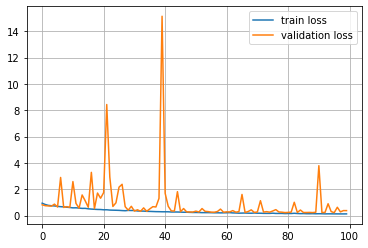

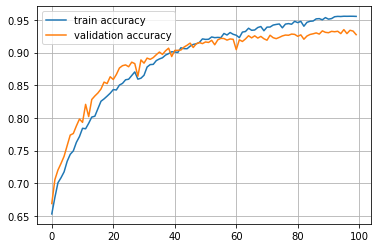

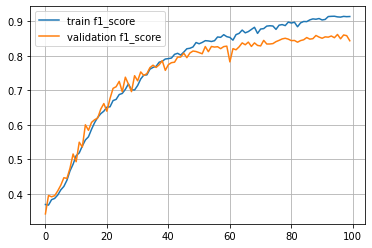

In [10]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

### df1-8까지의 모델 : conv 64 - conv 128  전체 데이터셋 : dense 512  dropout : 0.8 0.7
### concat : dense 256 - 128

In [9]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train, df7_x_train,
                 df8_x_train, entire_x_train], y_train,
                 epochs=200, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid,
                                                df6_x_valid, df7_x_valid, df8_x_valid, entire_x_valid],
                                                y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

2022-07-18 14:57:12.209803: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-07-18 14:57:15.792010: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2022-07-18 14:57:16.741044: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-18 14:57:17.602460: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


840/840 [==============================] - 27s 25ms/step - loss: 0.9519 - accuracy: 0.6505 - f1_score: 0.3576 - val_loss: 0.8068 - val_accuracy: 0.6909 - val_f1_score: 0.3793
Epoch 2/200
840/840 [==============================] - 20s 24ms/step - loss: 0.8400 - accuracy: 0.6783 - f1_score: 0.3663 - val_loss: 0.8891 - val_accuracy: 0.6732 - val_f1_score: 0.3254
Epoch 3/200
840/840 [==============================] - 20s 24ms/step - loss: 0.7985 - accuracy: 0.6911 - f1_score: 0.3770 - val_loss: 0.8875 - val_accuracy: 0.7100 - val_f1_score: 0.3832
Epoch 4/200
840/840 [==============================] - 20s 24ms/step - loss: 0.7633 - accuracy: 0.7058 - f1_score: 0.3804 - val_loss: 0.7170 - val_accuracy: 0.7223 - val_f1_score: 0.4076
Epoch 5/200
840/840 [==============================] - 21s 24ms/step - loss: 0.7470 - accuracy: 0.7099 - f1_score: 0.3864 - val_loss: 0.7644 - val_accuracy: 0.7335 - val_f1_score: 0.4189
Epoch 6/200
840/840 [==============================] - 20s 24ms/step - loss: 

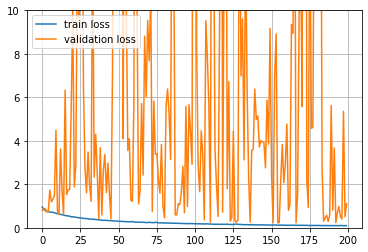

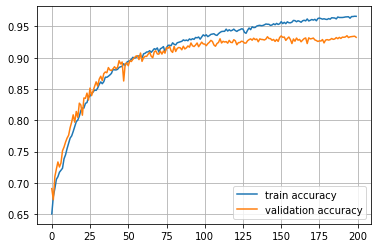

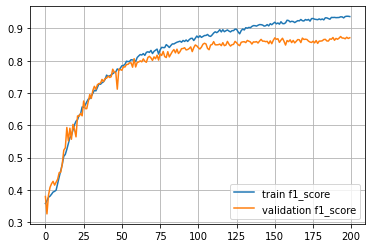

In [24]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.ylim([0,10])

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

In [17]:
from sklearn import metrics

pred = model.predict([df1_x_train,
                      df2_x_train,
                      df3_x_train,
                      df4_x_train,
                      df5_x_train,
                      df6_x_train,
                      df7_x_train,
                      df8_x_train,
                      entire_x_train], verbose=1)
print(metrics.classification_report(np.argmax(y_train, axis=1),np.argmax(pred, axis=1),
                                    target_names=set(df['leaktype'].values)))

840/840 [==============================] - 8s 10ms/step
              precision    recall  f1-score   support

         out       0.99      0.99      0.99      5586
      normal       0.98      0.99      0.99      3976
       other       1.00      1.00      1.00     14470
          in       1.00      0.98      0.99      1430
       noise       0.99      0.97      0.98      1418

    accuracy                           0.99     26880
   macro avg       0.99      0.99      0.99     26880
weighted avg       0.99      0.99      0.99     26880



In [19]:
from sklearn import metrics

pred = model.predict([df1_x_valid,
                      df2_x_valid,
                      df3_x_valid,
                      df4_x_valid,
                      df5_x_valid,
                      df6_x_valid,
                      df7_x_valid,
                      df8_x_valid,
                      entire_x_valid], verbose=1)
print(metrics.classification_report(np.argmax(y_valid, axis=1),np.argmax(pred, axis=1),
                                    target_names=set(df['leaktype'].values)))

210/210 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

         out       0.90      0.93      0.92      1414
      normal       0.89      0.91      0.90      1024
       other       0.97      0.99      0.98      3530
          in       0.86      0.74      0.79       370
       noise       0.85      0.70      0.77       382

    accuracy                           0.93      6720
   macro avg       0.90      0.85      0.87      6720
weighted avg       0.93      0.93      0.93      6720



### df1-8까지의 모델 : conv 128 - conv 64  전체 데이터셋 : dense 512  dropout : 0.8 0.7
### concat : dense 1024 - 512

In [30]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train, df7_x_train,
                 df8_x_train, entire_x_train], y_train,
                 epochs=200, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid,
                                                df6_x_valid, df7_x_valid, df8_x_valid, entire_x_valid],
                                                y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/200
840/840 [==============================] - 25s 26ms/step - loss: 1.1015 - accuracy: 0.6265 - f1_score: 0.3452 - val_loss: 1.0158 - val_accuracy: 0.6438 - val_f1_score: 0.3161
Epoch 2/200
840/840 [==============================] - 21s 25ms/step - loss: 0.9082 - accuracy: 0.6532 - f1_score: 0.3517 - val_loss: 0.9699 - val_accuracy: 0.6833 - val_f1_score: 0.3066
Epoch 3/200
840/840 [==============================] - 21s 25ms/step - loss: 0.8579 - accuracy: 0.6685 - f1_score: 0.3617 - val_loss: 6.5798 - val_accuracy: 0.6756 - val_f1_score: 0.3354
Epoch 4/200
840/840 [==============================] - 21s 25ms/step - loss: 0.8416 - accuracy: 0.6759 - f1_score: 0.3691 - val_loss: 1.8497 - val_accuracy: 0.6799 - val_f1_score: 0.3333
Epoch 5/200
840/840 [==============================] - 21s 25ms/step - loss: 0.8012 - accuracy: 0.6913 - f1_score: 0.3794 - val_loss: 60.4592 - val_accuracy: 0.6732 - val_f1_score: 0.3422
Epoch 6/200
840/840 [==============================] - 21s 25ms/

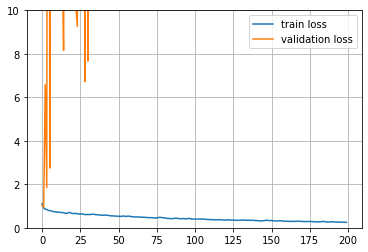

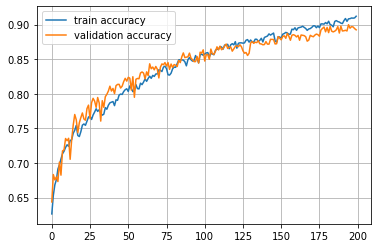

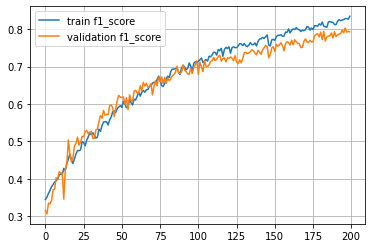

In [31]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.ylim([0,10])

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

In [32]:
from sklearn import metrics

pred = model.predict([df1_x_train,
                      df2_x_train,
                      df3_x_train,
                      df4_x_train,
                      df5_x_train,
                      df6_x_train,
                      df7_x_train,
                      df8_x_train,
                      entire_x_train], verbose=1)
print(metrics.classification_report(np.argmax(y_train, axis=1),np.argmax(pred, axis=1),
                                    target_names=set(df['leaktype'].values)))

840/840 [==============================] - 9s 10ms/step
              precision    recall  f1-score   support

         out       0.85      0.93      0.89      5612
      normal       0.93      0.82      0.87      4016
       other       0.95      0.99      0.97     14394
          in       0.96      0.75      0.84      1449
       noise       0.95      0.69      0.80      1409

    accuracy                           0.93     26880
   macro avg       0.93      0.84      0.88     26880
weighted avg       0.93      0.93      0.92     26880



In [33]:
from sklearn import metrics

pred = model.predict([df1_x_valid,
                      df2_x_valid,
                      df3_x_valid,
                      df4_x_valid,
                      df5_x_valid,
                      df6_x_valid,
                      df7_x_valid,
                      df8_x_valid,
                      entire_x_valid], verbose=1)
print(metrics.classification_report(np.argmax(y_valid, axis=1),np.argmax(pred, axis=1),
                                    target_names=set(df['leaktype'].values)))

210/210 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

         out       0.80      0.90      0.84      1388
      normal       0.87      0.80      0.83       984
       other       0.94      0.99      0.97      3606
          in       0.81      0.58      0.68       351
       noise       0.87      0.51      0.64       391

    accuracy                           0.89      6720
   macro avg       0.86      0.76      0.79      6720
weighted avg       0.89      0.89      0.89      6720



### df1-8까지의 모델 : conv 128 - conv 64  전체 데이터셋 : dense 512  dropout : 0.8 0.7
### concat : dense 2048 - 1024

In [39]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train, df7_x_train,
                 df8_x_train, entire_x_train], y_train,
                 epochs=200, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid,
                                                df6_x_valid, df7_x_valid, df8_x_valid, entire_x_valid],
                                                y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/200
840/840 [==============================] - 25s 26ms/step - loss: 1.1474 - accuracy: 0.6289 - f1_score: 0.3559 - val_loss: 1.1467 - val_accuracy: 0.6515 - val_f1_score: 0.3416
Epoch 2/200
840/840 [==============================] - 21s 25ms/step - loss: 0.8825 - accuracy: 0.6671 - f1_score: 0.3749 - val_loss: 3.9106 - val_accuracy: 0.6665 - val_f1_score: 0.3648
Epoch 3/200
840/840 [==============================] - 21s 25ms/step - loss: 0.8362 - accuracy: 0.6771 - f1_score: 0.3712 - val_loss: 3.2397 - val_accuracy: 0.7067 - val_f1_score: 0.3595
Epoch 4/200
840/840 [==============================] - 21s 25ms/step - loss: 0.8063 - accuracy: 0.6893 - f1_score: 0.3853 - val_loss: 3.3724 - val_accuracy: 0.7250 - val_f1_score: 0.4030
Epoch 5/200
840/840 [==============================] - 22s 26ms/step - loss: 0.7887 - accuracy: 0.6924 - f1_score: 0.3865 - val_loss: 4.6699 - val_accuracy: 0.7354 - val_f1_score: 0.4064
Epoch 6/200
840/840 [==============================] - 21s 25ms/s

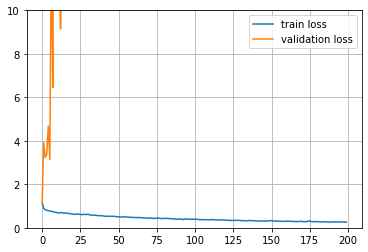

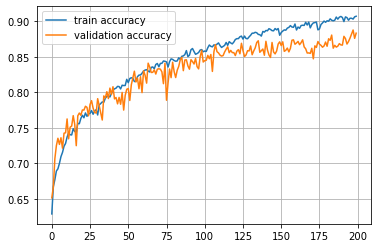

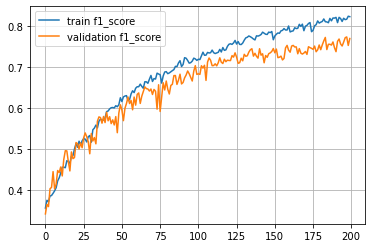

In [40]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.ylim([0,10])

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

In [41]:
from sklearn import metrics

pred = model.predict([df1_x_train,
                      df2_x_train,
                      df3_x_train,
                      df4_x_train,
                      df5_x_train,
                      df6_x_train,
                      df7_x_train,
                      df8_x_train,
                      entire_x_train], verbose=1)
print(metrics.classification_report(np.argmax(y_train, axis=1),np.argmax(pred, axis=1),
                                    target_names=set(df['leaktype'].values)))

840/840 [==============================] - 8s 9ms/step
              precision    recall  f1-score   support

         out       0.88      0.89      0.88      5578
      normal       0.88      0.85      0.86      4031
       other       0.94      1.00      0.97     14379
          in       0.95      0.69      0.80      1443
       noise       0.87      0.64      0.74      1449

    accuracy                           0.92     26880
   macro avg       0.90      0.81      0.85     26880
weighted avg       0.91      0.92      0.91     26880



In [42]:
from sklearn import metrics

pred = model.predict([df1_x_valid,
                      df2_x_valid,
                      df3_x_valid,
                      df4_x_valid,
                      df5_x_valid,
                      df6_x_valid,
                      df7_x_valid,
                      df8_x_valid,
                      entire_x_valid], verbose=1)
print(metrics.classification_report(np.argmax(y_valid, axis=1),np.argmax(pred, axis=1),
                                    target_names=set(df['leaktype'].values)))

210/210 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

         out       0.84      0.85      0.84      1422
      normal       0.82      0.81      0.81       969
       other       0.93      0.99      0.96      3621
          in       0.84      0.51      0.64       357
       noise       0.72      0.51      0.60       351

    accuracy                           0.88      6720
   macro avg       0.83      0.73      0.77      6720
weighted avg       0.88      0.88      0.88      6720

